<a href="https://colab.research.google.com/github/Gilberto2812/Supervised_learning/blob/main/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing model
from sklearn.neighbors import KNeighborsClassifier

#Import data
from sklearn.datasets import load_breast_cancer
datos = load_breast_cancer()
X = datos['data']
y = datos['target']

#Split train-test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5, stratify=y)
ft = load_breast_cancer().feature_names

In [3]:
#Prediction for k = 7
cancer_7 = KNeighborsClassifier(n_neighbors=7)

#Fitting model
cancer_7.fit(X_train, y_train)

#Calculating prediction
y_pred = cancer_7.predict(X_test)

In [4]:
#Accuracy
cancer_7.score(X_test, y_test)

0.9473684210526315

In [5]:
#Prediction for k = 5
cancer_5 = KNeighborsClassifier(n_neighbors=5)

#Fitting model
cancer_5.fit(X_train, y_train)

#Calculating prediction
y_pred = cancer_5.predict(X_test)

In [6]:
#Accuracy
cancer_5.score(X_test, y_test)

0.935672514619883

Accuracy is better for k = 7, so it's most likely to have accurate prediction using "cancer_7" model.

In [7]:
#Now we'll look for the best model between k = 1 and k = 30

#Creating dict to save results
results = {
    key: [] for key in range(1, 31)
}

#Loop for looking the best knn model
for seed in [3, 5, 10, 49]:  #We'll test for different seed, in order to get different train-test splits
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed, stratify=y)
    for k in range(1, 31):
        cancer = KNeighborsClassifier(n_neighbors=k)
        cancer.fit(X_train, y_train)
        sc = cancer.score(X_test, y_test)
        results[k].append(sc)

In [8]:
#Now it's time to compare results

#Create a dataframe to manipulate data in an easier way
results_df = pd.DataFrame(results)

#Results
print(f'If we look on the average score, the best model is k = {results_df.mean().idxmax()}, with a score = {results_df.mean().max()}')
print(f'If we look on the maximum score value, the best model is k = {results_df.max().idxmax()}, with a score = {results_df.max().max()}')
print(f'If we look on the minimum score, the best model is k = {results_df.min().idxmax()}, with a score = {results_df.min().max()}')

If we look on the average score, the best model is k = 3, with a score = 0.9371345029239766
If we look on the maximum score value, the best model is k = 3, with a score = 0.9532163742690059
If we look on the minimum score, the best model is k = 3, with a score = 0.9298245614035088


We can conclude that for these samples the best model is with k = 3

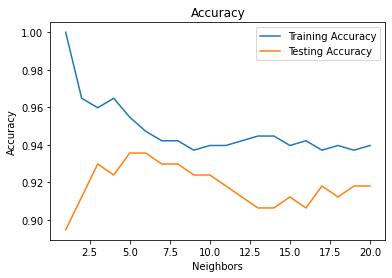

In [9]:
#Plotting test and training accuracy
test_accuracy = {}
training_accuracy = {}
neighbors = np.arange(1, 21)
for k in neighbors:
    cancer = KNeighborsClassifier(n_neighbors=k)
    cancer.fit(X_train, y_train)
    training_accuracy[k] = cancer.score(X_train, y_train)
    test_accuracy[k] = cancer.score(X_test, y_test)

plt.title('Accuracy')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')

plt.plot(neighbors, list(training_accuracy.values()), label="Training Accuracy")
plt.plot(neighbors, list(test_accuracy.values()), label="Testing Accuracy")
plt.legend()

plt.show()